#**Imports & Data**

## **Import libraries**

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

## **Load Data**

In [184]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [185]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [186]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# **EDA**

In [187]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [188]:
train.shape

(15819, 3)

In [189]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [190]:
test.shape

(10546, 2)

In [191]:
# View class distribution to confirm balance/imbalance
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

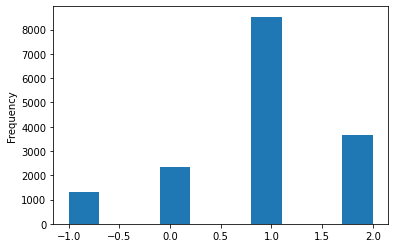

In [192]:
# View class distribution to confirm balance/imbalance
train['sentiment'].plot(kind='hist')
plt.show()

# **Pre-Processing**

In [193]:
# Split train data into Features and Target Variable
y = train['sentiment']
X = train['message']

In [194]:
# Create vectorizer
count_vect = CountVectorizer(ngram_range=(1,2), max_df=0.80, strip_accents='unicode')

In [195]:
# Fit vertorizer to Features and transform data
X_vectorized = count_vect.fit_transform(X)

In [196]:
# Create sampler for minority classes
over_sampler = RandomOverSampler(sampling_strategy='minority',
                                 random_state=100)

In [197]:
# Fit sampler to training data
X, y = over_sampler.fit_resample(X_vectorized, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [198]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  stratify=y,
                                                  random_state=18)

# **Model**

In [199]:
lr = LogisticRegression(C=10, solver='liblinear')
# Fit model to training data
lr.fit(X_train, y_train)
# Use trained model to run prediction on validation data
lr_pred = lr.predict(X_val)

## **Model Performance**

In [200]:
# Generate macro F1 Score
f1_score(y_val, lr_pred, average="macro")

0.7849308645577022

# **Test Data**

In [201]:
# Assign raw text to variable
test_x = test['message']
# Vectorize variable
test_vect = count_vect.transform(test_x)

## **Test Data Prediction**

In [202]:
# Run trained model on vectorized test data for prediction
y_pred = lr.predict(test_vect)

In [203]:
# Add predictions to Test dataframe
test['sentiment'] = y_pred

In [204]:
test.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,1
1,Combine this with the polling of staffers re c...,35326,1
2,"The scary, unimpeachable evidence that climate...",224985,1
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,1
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,0


### **Generate CSV**

In [205]:
# Generate CSV for Kaggle submission
test[['tweetid', 'sentiment']].to_csv('testsubmission.csv', index=False)